In [1]:
#hp = hyperparameters[dataset]

#classes = hp['classes']

import pandas as pd
#import xlrd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.impute import KNNImputer
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
pd.DataFrame.iteritems=pd.DataFrame.items
tf.compat.v1.disable_v2_behavior()
# change the strings to ints
#input= pd.DataFrame(pd.read_csv("US Insurance Claims Data.xlsx", encoding='utf-16-le', encoding_errors='ignore'))
input=pd.read_excel("US_Insurance_Claims_Data.xlsx")
input=input.fillna(method='bfill').fillna(method='ffill')

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
input.incident_location=input.incident_location.astype('category').cat.codes
input.policy_state=input.policy_state.astype('category').cat.codes
input.insured_education_level=input.insured_education_level.astype('category').cat.codes
input.insured_sex=input.insured_sex.astype('category').cat.codes
input.insured_hobbies=input.insured_hobbies.astype('category').cat.codes
input.insured_relationship=input.insured_relationship.astype('category').cat.codes
input.incident_type=input.incident_type.astype('category').cat.codes
input.collision_type=input.collision_type.astype('category').cat.codes
input.incident_severity=input.incident_severity.astype('category').cat.codes
input.authorities_contacted=input.authorities_contacted.astype('category').cat.codes
input.incident_state=input.incident_state.astype('category').cat.codes
input.incident_city=input.incident_city.astype('category').cat.codes
input.insured_occupation=input.insured_occupation.astype('category').cat.codes
input.property_damage=input.property_damage.astype('category').cat.codes
input.police_report_available=input.police_report_available.astype('category').cat.codes
input.auto_make=input.auto_make.astype('category').cat.codes
input.auto_model=input.auto_model.astype('category').cat.codes
#input['fraud_reported']=input['fraud_reported'].fillna(method='ffill').fillna(method='bfill')
input.fraud_reported=input.fraud_reported.astype('category').cat.codes
input.incident_date=input.incident_date.astype('category').cat.codes
input.policy_bind_date=input.incident_date.astype('category').cat.codes
input['policy_csl'] = input['policy_csl'].apply(lambda x: eval(x))

In [3]:
#img_rows, img_cols = 32, 32
#train_size = trainX.shape[0]

def KNN_impute(input, k):
    imputer = KNNImputer(n_neighbors=k)
    df_filled = imputer.fit_transform(input)
    matrix=pd.DataFrame(df_filled, columns=['months_as_customer', 'age', 'policy_number', 'policy_bind_date' , 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported'])
    #matrix = pd.DataFrame(df_filled, columns=['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', ])
    matrix.to_csv("DataKNN" +  str(k) + ".csv" )
    return matrix

In [3]:
import tensorflow as tf

In [3]:
# trainX,testX,trainY,testY=train_test_split(X_res,y_res,test_size=0.2)
#matrix=KNN_impute(input, 2)   
from tensorflow.keras.preprocessing.sequence import pad_sequences

#trainX_padded = pad_sequences(trainX, padding='post', truncating='post')
#testX_padded = pad_sequences(testX, padding='post', truncating='post')
#trainY_padded = pad_sequences(trainY, padding='post', truncating='post')

#testY_padded = pad_sequences(testY, padding='post', truncating='post')



grouped = input.groupby('months_as_customer')

# Extract sequences and labels
sequences = grouped.apply(lambda X: X[['months_as_customer', 'age', 'policy_number', 'policy_bind_date' , 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year']].values.tolist())
labels = grouped['fraud_reported'].first().values
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad to same length (post-padding with zeros)
X = pad_sequences(sequences.tolist(), padding='post', dtype='float32')
y = np.array(labels)




from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Flatten for oversampling

#X_resampled, y_resampled = ros.fit_resample(X_flat, y)
#
#X_resampled, y_resampled = sm.fit_resample(X_flat, y)


# Reshape back to 3D

X_flat = X.reshape((X.shape[0], -1))
#ros = RandomOverSampler(random_state=1)
ros=RandomUnderSampler(random_state=1000)
sm=SMOTE(random_state=1000)

X_resampled, y_resampled = sm.fit_resample(X_flat, y)
X_resampled, y_resampled = ros.fit_resample(X_resampled,  y_resampled)

X_resampled = X_resampled.reshape((-1, X.shape[1], X.shape[2]))




#trainY = utils.to_categorical(trainY)
#testY = utils.to_categorical(testY)
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'top_k_categorical_accuracy'])
#csv_logger = CSVLogger(logfile, append=True, separator=';')





In [6]:
def KNN_impute(input, k):
    imputer = KNNImputer(n_neighbors=k)
    df_filled = imputer.fit_transform(input)
    matrix=pd.DataFrame(df_filled, columns=['months_as_customer', 'age', 'policy_number', 'policy_bind_date' , 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported'])
    #matrix = pd.DataFrame(df_filled, columns=['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', ])
    matrix.to_csv("DataKNN" +  str(k) + ".csv" )
    return matrix

In [7]:

#nonconvex_focal_loss = nonconvex_loss_fn
#convex_focal_loss = convex_loss_fn

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking
from sklearn.utils import class_weight
from tensorflow.keras.initializers import RandomNormal

optim_adam = tf.compat.v1.train.AdamOptimizer(0.1)



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking
from sklearn.utils import class_weight

#optim_adam = tf.compat.v1.train.AdamOptimizer(0.1)


#trainX,testX,trainY,testY=train_test_split((X_resampled), (y_resampled), test_size=0.2, random_state=1000)




#convex_loss_fn = tf.keras.losses.BinaryFocalCrossentropy(
#    apply_class_balancing=False, alpha=0.25, gamma=0.0, from_logits=False,
#    label_smoothing=0.0, axis=-1, reduction='sum_over_batch_size'
#)


#hybrid_convex_loss_fn = tf.keras.losses.BinaryFocalCrossentropy(
 #   apply_class_balancing=False, alpha=0.25, gamma=2.0, from_logits=False,
  #  label_smoothing=0.0, axis=-1, reduction='sum_over_batch_size'
#)


#nonconvex_loss_fn = tf.keras.losses.BinaryFocalCrossentropy(
 #   apply_class_balancing=False, alpha=0.25, gamma=8.0, from_logits=False,
#    label_smoothing=0.0, axis=-1, reduction='sum_over_batch_size'
#)


import tensorflow as tf
import tensorflow.keras.backend as K

class NoisyLossWrapper(tf.keras.losses.Loss):
    def __init__(self, base_loss_fn, noise_scale=0.5, name='noisy_loss'):
        super(NoisyLossWrapper, self).__init__(name=name)
        self.base_loss_fn = base_loss_fn
        self.noise_scale = noise_scale

    def call(self, y_true, y_pred):
        base_loss = self.base_loss_fn(y_true, y_pred)
        noise = tf.random.normal(shape=tf.shape(base_loss), mean=0.5, stddev=self.noise_scale) # make noise 0
        return base_loss + noise






def model_builder():
    model = tf.keras.Sequential([
        tf.keras.layers.Masking(mask_value=0.0, input_shape=(X.shape[1], X.shape[2])),
        tf.keras.layers.LSTM(16),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model



convex_focal_loss_fn = tf.keras.losses.BinaryFocalCrossentropy(
    apply_class_balancing=False, alpha=0.25, gamma=0.0, from_logits=False,
    label_smoothing=0.0, axis=-1, reduction='sum_over_batch_size'
)
convex_focal_loss = NoisyLossWrapper(convex_focal_loss_fn, noise_scale=0.5)
#convex_focal_loss=convex_focal_loss_fn
convex_focal_loss.__name__ = "convex_focal_loss"

nonconvex_focal_loss_fn = tf.keras.losses.BinaryFocalCrossentropy(
    apply_class_balancing=False, alpha=0.25, gamma=8.0, from_logits=False,
    label_smoothing=0.0, axis=-1, reduction='sum_over_batch_size'
)
nonconvex_focal_loss = NoisyLossWrapper(nonconvex_focal_loss_fn, noise_scale=0.5)
nonconvex_focal_loss.__name__ = "nonconvex_focal_loss"

training_schedule_convex = [
    {"loss_fn": convex_focal_loss, "epochs": 100},
]

training_schedule_multistage = [
    {"loss_fn": convex_focal_loss, "epochs":10},
    {"loss_fn": nonconvex_focal_loss, "epochs": 90},
]

training_schedule_nonconvex = [
    {"loss_fn": nonconvex_focal_loss, "epochs": 100},
]

from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import f1_score

def train_with_schedule(schedule, schedule_name):
    print(f"\n🚀 Training schedule: {schedule_name}")
    
    model = model_builder()
    
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.001,
        decay_steps=1000,
        decay_rate=0.9,
        staircase=True
    )
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    
    current_epoch = 0
    
    for i, stage in enumerate(schedule):
        loss_fn = stage["loss_fn"]
        epochs = stage["epochs"]
        print(f"\n➡️ Stage {i + 1} | Epochs: {epochs} | Loss: {loss_fn.__name__}")

        model.compile(
            optimizer=optimizer,
            loss=loss_fn,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
        )

        model.fit(
            trainX, trainY,
            initial_epoch=current_epoch,
            epochs=current_epoch + epochs,
            batch_size=1,
            validation_data=(testX, testY),
            verbose=1
        )
        current_epoch += epochs
    
    # Evaluate on test data (accuracy, precision, recall)
    eval_results = model.evaluate(testX, testY, verbose=0)
    loss = eval_results[0]
    accuracy = eval_results[1]
    precision = eval_results[2]
    recall = eval_results[3]

    # Predict and compute F1 score
    y_pred_prob = model.predict(testX)
    y_pred = (y_pred_prob > 0.5).astype(int)
    f1 = f1_score(testY, y_pred)

    print(f"\n🎯 Finished schedule '{schedule_name}' with test loss: {loss:.4f}, "
          f"accuracy: {accuracy:.4f}, precision: {precision:.4f}, recall: {recall:.4f}, f1-score: {f1:.4f}")

    # ✅ SHAP explanation (computed after training)
    try:
        print("🔍 Computing SHAP values...")
        background = trainX[np.random.choice(trainX.shape[0], 100, replace=False)]  # Sampled for efficiency
        explainer = shap.GradientExplainer(model, background)
        shap_values = explainer.shap_values(testX[:100])  # Limit size for performance
        print("✅ SHAP values computed.")
    except Exception as e:
        print(f"⚠️ SHAP computation failed: {e}")
        shap_values = None

    return {
        "loss": loss,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "shap_values": shap_values
    }
#import shap
#import matplotlib.pyplot as plt

#results = {}

#results["Convex Only"] = train_with_schedule(training_schedule_convex, "Convex Only")
#results["Multistage"] = train_with_schedule(training_schedule_multistage, "Multistage")
#results["Nonconvex Only"] = train_with_schedule(training_schedule_nonconvex, "Nonconvex Only")

#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd

# Define number of top features to compare
#TOP_K = 38

# Store aggregated SHAP values per schedule
#shap_feature_importance = {}

#for name, metrics in results.items():
  #  shap_values = metrics.get("shap_values", None)

  #  if shap_values is not None:
  #      try:
            # Transpose to (samples, time_steps, features)
      #      reshaped_shap = np.transpose(shap_values[0], (2, 0, 1))  # (1, 51, 38)
        #    repeated_shap = np.repeat(reshaped_shap, 100, axis=0)    # (100, 51, 38)
        #    mean_abs_shap = np.mean(np.abs(repeated_shap), axis=(0, 1))  # (features,)

          #  shap_feature_importance[name] = mean_abs_shap

       # except Exception as e:
        #    print(f"❌ Failed to process SHAP values for {name}: {e}")
   # else:
     #   print(f"⚠️ No SHAP values for {name}")

# Combine into DataFrame for comparison
#df_importance = pd.DataFrame(shap_feature_importance)

# Optional: rename columns to feature names if you have them, e.g., feature_names = ['f1', ..., 'f38']
# df_importance.index = feature_names

# Get top K features by mean importance across all models
#top_features = df_importance.mean(axis=1).nlargest(TOP_K).index
#df_top = df_importance.loc[top_features]

# Plot
#df_top.plot(kind='bar', figsize=(12, 6))
#plt.title(f"🔍 Top {TOP_K} Important Features (SHAP) Across Training Schedules")
#plt.ylabel("Mean |SHAP value|")
#plt.xlabel("Feature Index")
#plt.xticks(rotation=0)
#plt.grid(True)
#plt.legend(title="Training Schedule")
#plt.tight_layout()
#plt.show()


📂 Fold 1/10

➡️ Stage 1 | Epochs: 100 | Loss: convex_focal_loss


2025-06-07 08:02:35.525029: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2025-06-07 08:02:35.539491: W tensorflow/c/c_api.cc:304] Operation '{name:'training/Adam/lstm/lstm_cell/kernel/v/Assign' id:1177 op device:{requested: '', assigned: ''} def:{{{node training/Adam/lstm/lstm_cell/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/lstm/lstm_cell/kernel/v, training/Adam/lstm/lstm_cell/kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates

🔍 Calculating SHAP values for fold 1 of 'Convex Only'

📂 Fold 2/10

➡️ Stage 1 | Epochs: 100 | Loss: convex_focal_loss


2025-06-07 08:11:01.123742: W tensorflow/c/c_api.cc:304] Operation '{name:'training_2/Adam/lstm_1/lstm_cell/recurrent_kernel/v/Assign' id:2951 op device:{requested: '', assigned: ''} def:{{{node training_2/Adam/lstm_1/lstm_cell/recurrent_kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_2/Adam/lstm_1/lstm_cell/recurrent_kernel/v, training_2/Adam/lstm_1/lstm_cell/recurrent_kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 08:11:


📂 Fold 3/10

➡️ Stage 1 | Epochs: 100 | Loss: convex_focal_loss


2025-06-07 08:19:49.863500: W tensorflow/c/c_api.cc:304] Operation '{name:'training_4/Adam/iter/Assign' id:4200 op device:{requested: '', assigned: ''} def:{{{node training_4/Adam/iter/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_INT64, validate_shape=false](training_4/Adam/iter, training_4/Adam/iter/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 08:19:55.304516: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_3/mul' id:3623 op device:{requested: '', assigned: ''} def:{{


📂 Fold 4/10

➡️ Stage 1 | Epochs: 100 | Loss: convex_focal_loss


2025-06-07 08:28:36.066079: W tensorflow/c/c_api.cc:304] Operation '{name:'training_6/Adam/dense_3/kernel/v/Assign' id:5575 op device:{requested: '', assigned: ''} def:{{{node training_6/Adam/dense_3/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_6/Adam/dense_3/kernel/v, training_6/Adam/dense_3/kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 08:28:41.593755: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_4/mul' id:493


📂 Fold 5/10

➡️ Stage 1 | Epochs: 100 | Loss: convex_focal_loss


2025-06-07 08:37:26.554502: W tensorflow/c/c_api.cc:304] Operation '{name:'training_8/Adam/lstm_4/lstm_cell/bias/v/Assign' id:6877 op device:{requested: '', assigned: ''} def:{{{node training_8/Adam/lstm_4/lstm_cell/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_8/Adam/lstm_4/lstm_cell/bias/v, training_8/Adam/lstm_4/lstm_cell/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 08:37:32.027593: W tensorflow/c/c_api.cc:304] Operatio


📂 Fold 6/10

➡️ Stage 1 | Epochs: 100 | Loss: convex_focal_loss


2025-06-07 08:46:07.984911: W tensorflow/c/c_api.cc:304] Operation '{name:'training_10/Adam/beta_1/Assign' id:8126 op device:{requested: '', assigned: ''} def:{{{node training_10/Adam/beta_1/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_10/Adam/beta_1, training_10/Adam/beta_1/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 08:46:13.680784: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_6/mul' id:7544 op device:{requested: '', 


📂 Fold 7/10

➡️ Stage 1 | Epochs: 100 | Loss: convex_focal_loss


2025-06-07 08:55:06.501656: W tensorflow/c/c_api.cc:304] Operation '{name:'training_12/Adam/lstm_6/lstm_cell/bias/v/Assign' id:9491 op device:{requested: '', assigned: ''} def:{{{node training_12/Adam/lstm_6/lstm_cell/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_12/Adam/lstm_6/lstm_cell/bias/v, training_12/Adam/lstm_6/lstm_cell/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 08:55:11.782881: W tensorflow/c/c_api.cc:304] Oper


📂 Fold 8/10

➡️ Stage 1 | Epochs: 100 | Loss: convex_focal_loss


2025-06-07 09:03:23.663145: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_7/kernel/Assign' id:9823 op device:{requested: '', assigned: ''} def:{{{node dense_7/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_7/kernel, dense_7/kernel/Initializer/random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 09:03:29.376885: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_8/mul' id:10158 op device:{requested: '', assigned: ''} def:{{{node loss_8/m


📂 Fold 9/10

➡️ Stage 1 | Epochs: 100 | Loss: convex_focal_loss


2025-06-07 09:12:04.147625: W tensorflow/c/c_api.cc:304] Operation '{name:'training_16/Adam/dense_8/kernel/m/Assign' id:12081 op device:{requested: '', assigned: ''} def:{{{node training_16/Adam/dense_8/kernel/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_16/Adam/dense_8/kernel/m, training_16/Adam/dense_8/kernel/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 09:12:09.742117: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_9/mul' i


📂 Fold 10/10

➡️ Stage 1 | Epochs: 100 | Loss: convex_focal_loss


2025-06-07 09:20:39.103203: W tensorflow/c/c_api.cc:304] Operation '{name:'true_positives_29/Assign' id:12472 op device:{requested: '', assigned: ''} def:{{{node true_positives_29/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](true_positives_29, true_positives_29/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 09:20:44.765250: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_10/mul' id:12772 op device:{requested: '', assigned: ''} def:{{{node los


📊 Average metrics for schedule 'Convex Only': {'loss': 0.9823261915430237, 'accuracy': 0.58454114, 'precision': 0.59853196, 'recall': 0.5175878, 'f1': 0.5415631380336496, 'auc': 0.6102859057465893}

📂 Fold 1/10

➡️ Stage 1 | Epochs: 10 | Loss: convex_focal_loss


2025-06-07 09:29:13.943956: W tensorflow/c/c_api.cc:304] Operation '{name:'true_negatives_10/Assign' id:13784 op device:{requested: '', assigned: ''} def:{{{node true_negatives_10/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](true_negatives_10, true_negatives_10/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 09:29:19.965499: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_11/mul' id:14079 op device:{requested: '', assigned: ''} def:{{{node los


➡️ Stage 2 | Epochs: 90 | Loss: nonconvex_focal_loss


2025-06-07 09:30:08.836627: W tensorflow/c/c_api.cc:304] Operation '{name:'count_11/Assign' id:14889 op device:{requested: '', assigned: ''} def:{{{node count_11/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](count_11, count_11/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-07 09:30:14.841687: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_12/mul' id:15163 op device:{requested: '', assigned: ''} def:{{{node loss_12/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_12/mul/x, loss_12/dense_10_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/User

🔍 Calculating SHAP values for fold 1 of 'Multistage'

📂 Fold 2/10

➡️ Stage 1 | Epochs: 10 | Loss: convex_focal_loss


2025-06-07 09:38:24.196924: W tensorflow/c/c_api.cc:304] Operation '{name:'training_24/Adam/beta_1/Assign' id:17415 op device:{requested: '', assigned: ''} def:{{{node training_24/Adam/beta_1/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_24/Adam/beta_1, training_24/Adam/beta_1/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 09:38:30.065120: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_14/mul' id:16833 op device:{requested: '


➡️ Stage 2 | Epochs: 90 | Loss: nonconvex_focal_loss


2025-06-07 09:39:18.058412: W tensorflow/c/c_api.cc:304] Operation '{name:'true_negatives_13/Assign' id:17622 op device:{requested: '', assigned: ''} def:{{{node true_negatives_13/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](true_negatives_13, true_negatives_13/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-07 09:39:24.024993: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_15/mul' id:17917 op device:{requested: '', assigned: ''} def:{{{node loss_15/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_15/mul/x, loss_15/dense_11_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running


📂 Fold 3/10

➡️ Stage 1 | Epochs: 10 | Loss: convex_focal_loss


2025-06-07 09:47:16.719387: W tensorflow/c/c_api.cc:304] Operation '{name:'training_28/Adam/dense_12/kernel/v/Assign' id:19772 op device:{requested: '', assigned: ''} def:{{{node training_28/Adam/dense_12/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_28/Adam/dense_12/kernel/v, training_28/Adam/dense_12/kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 09:47:22.578584: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_16/m


➡️ Stage 2 | Epochs: 90 | Loss: nonconvex_focal_loss


2025-06-07 09:48:10.200332: W tensorflow/c/c_api.cc:304] Operation '{name:'false_positives_31/Assign' id:19921 op device:{requested: '', assigned: ''} def:{{{node false_positives_31/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](false_positives_31, false_positives_31/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-07 09:48:16.286504: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_17/mul' id:20211 op device:{requested: '', assigned: ''} def:{{{node loss_17/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_17/mul/x, loss_17/dense_12_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after run


📂 Fold 4/10

➡️ Stage 1 | Epochs: 10 | Loss: convex_focal_loss


2025-06-07 09:56:13.499121: W tensorflow/c/c_api.cc:304] Operation '{name:'training_32/Adam/dense_13/bias/v/Assign' id:22071 op device:{requested: '', assigned: ''} def:{{{node training_32/Adam/dense_13/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_32/Adam/dense_13/bias/v, training_32/Adam/dense_13/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 09:56:19.163491: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_18/mul' id:2


➡️ Stage 2 | Epochs: 90 | Loss: nonconvex_focal_loss


2025-06-07 09:57:04.359209: W tensorflow/c/c_api.cc:304] Operation '{name:'true_negatives_17/Assign' id:22210 op device:{requested: '', assigned: ''} def:{{{node true_negatives_17/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](true_negatives_17, true_negatives_17/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-07 09:57:10.604541: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_19/mul' id:22505 op device:{requested: '', assigned: ''} def:{{{node loss_19/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_19/mul/x, loss_19/dense_13_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running


📂 Fold 5/10

➡️ Stage 1 | Epochs: 10 | Loss: convex_focal_loss


2025-06-07 10:05:14.415384: W tensorflow/c/c_api.cc:304] Operation '{name:'count_18/Assign' id:23441 op device:{requested: '', assigned: ''} def:{{{node count_18/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](count_18, count_18/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 10:05:20.503734: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_20/mul' id:23715 op device:{requested: '', assigned: ''} def:{{{node loss_20/mul}} = Mul[T=DT_FLOAT, _has_ma


➡️ Stage 2 | Epochs: 90 | Loss: nonconvex_focal_loss


2025-06-07 10:06:07.359768: W tensorflow/c/c_api.cc:304] Operation '{name:'false_negatives_38/Assign' id:24494 op device:{requested: '', assigned: ''} def:{{{node false_negatives_38/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](false_negatives_38, false_negatives_38/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-07 10:06:13.481598: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_21/mul' id:24799 op device:{requested: '', assigned: ''} def:{{{node loss_21/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_21/mul/x, loss_21/dense_14_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after run


📂 Fold 6/10

➡️ Stage 1 | Epochs: 10 | Loss: convex_focal_loss


2025-06-07 10:14:04.122570: W tensorflow/c/c_api.cc:304] Operation '{name:'training_40/Adam/lstm_15/lstm_cell/bias/m/Assign' id:26620 op device:{requested: '', assigned: ''} def:{{{node training_40/Adam/lstm_15/lstm_cell/bias/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_40/Adam/lstm_15/lstm_cell/bias/m, training_40/Adam/lstm_15/lstm_cell/bias/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 10:14:10.337075: W tensorflow/c/c_api.cc:304]


➡️ Stage 2 | Epochs: 90 | Loss: nonconvex_focal_loss


2025-06-07 10:14:57.869585: W tensorflow/c/c_api.cc:304] Operation '{name:'total_21/Assign' id:26814 op device:{requested: '', assigned: ''} def:{{{node total_21/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](total_21, total_21/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-07 10:15:04.151681: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_23/mul' id:27093 op device:{requested: '', assigned: ''} def:{{{node loss_23/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_23/mul/x, loss_23/dense_15_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/User


📂 Fold 7/10

➡️ Stage 1 | Epochs: 10 | Loss: convex_focal_loss


2025-06-07 10:22:58.825709: W tensorflow/c/c_api.cc:304] Operation '{name:'training_44/Adam/dense_16/bias/v/Assign' id:28953 op device:{requested: '', assigned: ''} def:{{{node training_44/Adam/dense_16/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_44/Adam/dense_16/bias/v, training_44/Adam/dense_16/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 10:23:05.187852: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_24/mul' id:2


➡️ Stage 2 | Epochs: 90 | Loss: nonconvex_focal_loss


2025-06-07 10:23:54.141491: W tensorflow/c/c_api.cc:304] Operation '{name:'false_positives_47/Assign' id:29097 op device:{requested: '', assigned: ''} def:{{{node false_positives_47/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](false_positives_47, false_positives_47/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-07 10:24:00.533200: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_25/mul' id:29387 op device:{requested: '', assigned: ''} def:{{{node loss_25/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_25/mul/x, loss_25/dense_16_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after run


📂 Fold 8/10

➡️ Stage 1 | Epochs: 10 | Loss: convex_focal_loss


2025-06-07 10:31:55.843477: W tensorflow/c/c_api.cc:304] Operation '{name:'true_negatives_24/Assign' id:30302 op device:{requested: '', assigned: ''} def:{{{node true_negatives_24/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](true_negatives_24, true_negatives_24/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 10:32:02.201197: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_26/mul' id:30597 op device:{requested: '', assigned: ''} def:{{{node los


➡️ Stage 2 | Epochs: 90 | Loss: nonconvex_focal_loss


2025-06-07 10:32:50.271726: W tensorflow/c/c_api.cc:304] Operation '{name:'true_positives_75/Assign' id:31361 op device:{requested: '', assigned: ''} def:{{{node true_positives_75/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](true_positives_75, true_positives_75/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-07 10:32:56.656916: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_27/mul' id:31681 op device:{requested: '', assigned: ''} def:{{{node loss_27/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_27/mul/x, loss_27/dense_17_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running


📂 Fold 9/10

➡️ Stage 1 | Epochs: 10 | Loss: convex_focal_loss


2025-06-07 10:40:32.101588: W tensorflow/c/c_api.cc:304] Operation '{name:'false_positives_52/Assign' id:32576 op device:{requested: '', assigned: ''} def:{{{node false_positives_52/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](false_positives_52, false_positives_52/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 10:40:38.242482: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_28/mul' id:32891 op device:{requested: '', assigned: ''} def:{{{node


➡️ Stage 2 | Epochs: 90 | Loss: nonconvex_focal_loss


2025-06-07 10:41:24.454991: W tensorflow/c/c_api.cc:304] Operation '{name:'true_positives_81/Assign' id:33655 op device:{requested: '', assigned: ''} def:{{{node true_positives_81/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](true_positives_81, true_positives_81/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-07 10:41:30.907162: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_29/mul' id:33975 op device:{requested: '', assigned: ''} def:{{{node loss_29/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_29/mul/x, loss_29/dense_18_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running


📂 Fold 10/10

➡️ Stage 1 | Epochs: 10 | Loss: convex_focal_loss


2025-06-07 10:49:18.544288: W tensorflow/c/c_api.cc:304] Operation '{name:'false_positives_56/Assign' id:34870 op device:{requested: '', assigned: ''} def:{{{node false_positives_56/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](false_positives_56, false_positives_56/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 10:49:25.258692: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_30/mul' id:35185 op device:{requested: '', assigned: ''} def:{{{node


➡️ Stage 2 | Epochs: 90 | Loss: nonconvex_focal_loss


2025-06-07 10:50:12.506191: W tensorflow/c/c_api.cc:304] Operation '{name:'true_negatives_29/Assign' id:35974 op device:{requested: '', assigned: ''} def:{{{node true_negatives_29/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](true_negatives_29, true_negatives_29/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-06-07 10:50:19.348596: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_31/mul' id:36269 op device:{requested: '', assigned: ''} def:{{{node loss_31/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_31/mul/x, loss_31/dense_19_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running


📊 Average metrics for schedule 'Multistage': {'loss': 0.6206809580778774, 'accuracy': 0.5948259, 'precision': 0.58518916, 'recall': 0.6394579, 'f1': 0.6032292672915822, 'auc': 0.6039298237997941}

📂 Fold 1/10

➡️ Stage 1 | Epochs: 100 | Loss: nonconvex_focal_loss


2025-06-07 10:58:27.664413: W tensorflow/c/c_api.cc:304] Operation '{name:'training_60/Adam/dense_20/bias/v/Assign' id:38129 op device:{requested: '', assigned: ''} def:{{{node training_60/Adam/dense_20/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_60/Adam/dense_20/bias/v, training_60/Adam/dense_20/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 10:58:33.740701: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_32/mul' id:3

🔍 Calculating SHAP values for fold 1 of 'Nonconvex Only'

📂 Fold 2/10

➡️ Stage 1 | Epochs: 100 | Loss: nonconvex_focal_loss


2025-06-07 11:06:40.499907: W tensorflow/c/c_api.cc:304] Operation '{name:'lstm_21/lstm_cell/recurrent_kernel/Assign' id:38738 op device:{requested: '', assigned: ''} def:{{{node lstm_21/lstm_cell/recurrent_kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](lstm_21/lstm_cell/recurrent_kernel, lstm_21/lstm_cell/recurrent_kernel/Initializer/mul_1)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 11:06:47.339700: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_34/m


📂 Fold 3/10

➡️ Stage 1 | Epochs: 100 | Loss: nonconvex_focal_loss


2025-06-07 11:15:27.524942: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_22/kernel/Assign' id:40218 op device:{requested: '', assigned: ''} def:{{{node dense_22/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_22/kernel, dense_22/kernel/Initializer/random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 11:15:34.316819: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_35/mul' id:40553 op device:{requested: '', assigned: ''} def:{{{node lo


📂 Fold 4/10

➡️ Stage 1 | Epochs: 100 | Loss: nonconvex_focal_loss


2025-06-07 11:24:29.349963: W tensorflow/c/c_api.cc:304] Operation '{name:'true_negatives_33/Assign' id:41565 op device:{requested: '', assigned: ''} def:{{{node true_negatives_33/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](true_negatives_33, true_negatives_33/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 11:24:36.325232: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_36/mul' id:41860 op device:{requested: '', assigned: ''} def:{{{node los


📂 Fold 5/10

➡️ Stage 1 | Epochs: 100 | Loss: nonconvex_focal_loss


2025-06-07 11:33:27.007401: W tensorflow/c/c_api.cc:304] Operation '{name:'training_68/Adam/decay/Assign' id:43759 op device:{requested: '', assigned: ''} def:{{{node training_68/Adam/decay/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_68/Adam/decay, training_68/Adam/decay/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 11:33:34.086118: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_37/mul' id:43167 op device:{requested: '', a


📂 Fold 6/10

➡️ Stage 1 | Epochs: 100 | Loss: nonconvex_focal_loss


2025-06-07 11:41:59.905280: W tensorflow/c/c_api.cc:304] Operation '{name:'false_positives_71/Assign' id:44184 op device:{requested: '', assigned: ''} def:{{{node false_positives_71/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](false_positives_71, false_positives_71/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 11:42:07.220435: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_38/mul' id:44474 op device:{requested: '', assigned: ''} def:{{{node


📂 Fold 7/10

➡️ Stage 1 | Epochs: 100 | Loss: nonconvex_focal_loss


2025-06-07 11:51:42.683845: W tensorflow/c/c_api.cc:304] Operation '{name:'true_positives_110/Assign' id:45481 op device:{requested: '', assigned: ''} def:{{{node true_positives_110/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](true_positives_110, true_positives_110/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 11:51:50.093537: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_39/mul' id:45781 op device:{requested: '', assigned: ''} def:{{{node


📂 Fold 8/10

➡️ Stage 1 | Epochs: 100 | Loss: nonconvex_focal_loss


2025-06-07 12:00:50.400271: W tensorflow/c/c_api.cc:304] Operation '{name:'count_37/Assign' id:46814 op device:{requested: '', assigned: ''} def:{{{node count_37/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](count_37, count_37/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-07 12:00:56.726580: W tensorflow/c/c_api.cc:304] Operation '{name:'loss_40/mul' id:47088 op device:{requested: '', assigned: ''} def:{{{node loss_40/mul}} = Mul[T=DT_FLOAT, _has_ma


📂 Fold 9/10

➡️ Stage 1 | Epochs: 100 | Loss: nonconvex_focal_loss


2025-06-07 12:08:26.587723: W tensorflow/c/c_api.cc:304] Operation '{name:'training_76/Adam/lstm_28/lstm_cell/recurrent_kernel/v/Assign' id:49030 op device:{requested: '', assigned: ''} def:{{{node training_76/Adam/lstm_28/lstm_cell/recurrent_kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_76/Adam/lstm_28/lstm_cell/recurrent_kernel/v, training_76/Adam/lstm_28/lstm_cell/recurrent_kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-


📂 Fold 10/10

➡️ Stage 1 | Epochs: 100 | Loss: nonconvex_focal_loss


2025-06-07 12:17:04.439154: W tensorflow/c/c_api.cc:304] Operation '{name:'training_78/Adam/lstm_29/lstm_cell/recurrent_kernel/m/Assign' id:50308 op device:{requested: '', assigned: ''} def:{{{node training_78/Adam/lstm_29/lstm_cell/recurrent_kernel/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_78/Adam/lstm_29/lstm_cell/recurrent_kernel/m, training_78/Adam/lstm_29/lstm_cell/recurrent_kernel/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/boabangfrancis/anaconda3/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2025-06-


📊 Average metrics for schedule 'Nonconvex Only': {'loss': 0.4145877762346328, 'accuracy': 0.5465823, 'precision': 0.544824, 'recall': 0.61810726, 'f1': 0.5686534121023873, 'auc': 0.5885540058332269}
✅ Metrics exported to 'cross_validation_results_2.csv'


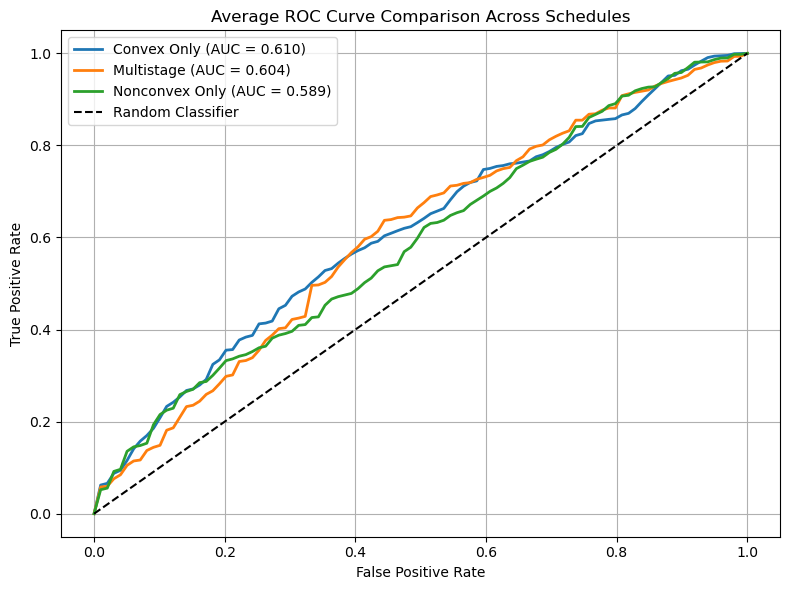

In [5]:
 from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.metrics import Precision, Recall, AUC
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import shap
import pandas as pd

shap_feature_importance = {}

def cross_validate(schedule, schedule_name, X_data, y_data, k_folds=10):
    kfold = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    metrics_list = []
    roc_data = []

    for fold, (train_index, val_index) in enumerate(kfold.split(X_data)):
        print(f"\n📂 Fold {fold + 1}/{k_folds}")

        X_train_fold, X_val_fold = X_data[train_index], X_data[val_index]
        y_train_fold, y_val_fold = y_data[train_index], y_data[val_index]

        result = train_with_schedule_fold(schedule, schedule_name, X_train_fold, y_train_fold, X_val_fold, y_val_fold, fold)
        metrics_list.append(result)
        roc_data.append((result["fpr"], result["tpr"]))

    avg_metrics = {
        "loss": np.mean([m["loss"] for m in metrics_list]),
        "accuracy": np.mean([m["accuracy"] for m in metrics_list]),
        "precision": np.mean([m["precision"] for m in metrics_list]),
        "recall": np.mean([m["recall"] for m in metrics_list]),
        "f1": np.mean([m["f1"] for m in metrics_list]),
        "auc": np.mean([m["auc"] for m in metrics_list]),
    }

    print(f"\n📊 Average metrics for schedule '{schedule_name}': {avg_metrics}")
    return avg_metrics, roc_data

def train_with_schedule_fold(schedule, schedule_name, trainX, trainY, testX, testY, fold_index):
    model = model_builder()

    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.001,
        decay_steps=1000,
        decay_rate=0.9,
        staircase=True
    )
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr_schedule)
    current_epoch = 0

    for i, stage in enumerate(schedule):
        loss_fn = stage["loss_fn"]
        epochs = stage["epochs"]
        print(f"\n➡️ Stage {i + 1} | Epochs: {epochs} | Loss: {loss_fn.__name__}")

        model.compile(
            optimizer=optimizer,
            loss=loss_fn,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        model.fit(
            trainX, trainY,
            initial_epoch=current_epoch,
            epochs=current_epoch + epochs,
            batch_size=1,
            validation_data=(testX, testY),
            verbose=0
        )
        current_epoch += epochs

    eval_results = model.evaluate(testX, testY, verbose=0)
    y_pred_prob = model.predict(testX, verbose=0).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)

    f1 = f1_score(testY, y_pred)
    auc_score = roc_auc_score(testY, y_pred_prob)
    fpr, tpr, _ = roc_curve(testY, y_pred_prob)

    # SHAP values for fold 1 only
    if fold_index == 0:
        print(f"🔍 Calculating SHAP values for fold 1 of '{schedule_name}'")
        background = trainX[:100].astype(np.float32)
        test_sample = testX[:100].astype(np.float32)

        # Recompile without metrics for SHAP
        model.compile(optimizer=optimizer, loss=loss_fn)

        explainer = shap.GradientExplainer(model, background)
        shap_values = explainer.shap_values(test_sample)[0]

        mean_abs_shap = np.abs(shap_values).mean(axis=0)
        feature_names = getattr(testX, "columns", [f"Feature {i}" for i in range(testX.shape[1])])
        shap_feature_importance[schedule_name] = dict(zip(feature_names, mean_abs_shap))

    return {
        "loss": eval_results[0],
        "accuracy": eval_results[1],
        "precision": eval_results[2],
        "recall": eval_results[3],
        "auc": auc_score,
        "f1": f1,
        "fpr": fpr,
        "tpr": tpr
    }

def average_roc_curves(roc_data, num_points=100):
    mean_fpr = np.linspace(0, 1, num_points)
    tprs = []

    for fpr, tpr in roc_data:
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    return mean_fpr, mean_tpr, mean_auc

# 🧪 Run experiments and collect metrics
results_cv = {}
roc_data_schedules = {}

results_cv["Convex Only"], roc_data_schedules["Convex Only"] = cross_validate(training_schedule_convex, "Convex Only", X_resampled, y_resampled)
results_cv["Multistage"], roc_data_schedules["Multistage"] = cross_validate(training_schedule_multistage, "Multistage", X_resampled, y_resampled)
results_cv["Nonconvex Only"], roc_data_schedules["Nonconvex Only"] = cross_validate(training_schedule_nonconvex, "Nonconvex Only", X_resampled, y_resampled)

# 📤 Export metrics to CSV
results_df = pd.DataFrame.from_dict(results_cv, orient='index')
results_df.to_csv("cross_validation_results_2.csv", index_label="Schedule")
print("✅ Metrics exported to 'cross_validation_results_2.csv'")

# 📊 Plot average ROC curves
plt.figure(figsize=(8, 6))
for name, data in roc_data_schedules.items():
    fpr, tpr, auc_val = average_roc_curves(data)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {auc_val:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.title("Average ROC Curve Comparison Across Schedules")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# 📊 SHAP Comparison Bar Plot
shap_df = pd.DataFrame(shap_feature_importance).fillna(0)
shap_df["mean"] = shap_df.mean(axis=1)
shap_df
shap_df.to_csv("cross_validation_shap_2.csv", index_label="Schedule")

shap_df = shap_df.sort_values("mean", ascending=True)
shap_df.drop("mean", axis=1, inplace=True)


In [7]:
#roc_data_schedules
roc_data_schedules_ros= pd.DataFrame.from_dict(roc_data_schedules, orient='index')
roc_data_schedules_ros.to_csv("cross_validation_roc_data_2.csv", index_label="Schedule")